# Duality of Multiple Access and Broadcast Channels

Python script for illustrating duality of BC and MAC with
superposition coding with successive cancellation,

construction of MAC rate region by intersecting BC rate regions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------------------------------------------------------------------------
# parameter definitions
# ---------------------------------------------------------------------------------------------------------------------

# SNRs of both channels
SNR1dB = 10
SNR2dB = 7

SNR1 = 10**(SNR1dB/10)
SNR2 = 10**(SNR2dB/10)

# power split parameter for BC (downlink)
alpha = np.arange(0.001,0.999,0.001)

# -----------------------------------------------------------------------
# BC (downlink)
# factor for equivalent channels
a = np.arange(0.1, 5.0, 0.1)

# total transmit power
P = 1/a + 1;

Individual link capacities for two users for AWGN channels with Gaussian inputs are
\begin{align*}
    C_1 &= \log_2(1 + \mathsf{SNR}_1) \\
    C_2 &= \log_2(1 + \mathsf{SNR}_2) \; .
\end{align*}

In [2]:
# channel capacities for individual channels
C1 = np.log2(1+SNR1)
C2 = np.log2(1+SNR2)

The MAC rate region for the 2-user case is a pentagon which is characterized by the points

\begin{align*}
    \big( I(X_1;Y), I(X_2;Y \mid X_1) \big) 
    &= \left( \log_2 \left(1 + \frac{\mathsf{SNR}_1}{1+\mathsf{SNR}_2} \right), \, 
        \log_2 \left( 1 + \mathsf{SNR}_2 \right) \right) \\
    \big( I(X_2;Y), I(X_1;Y \mid X_2) \big) 
    &= \left( \log_2 \left( 1 + \frac{\mathsf{SNR}_2}{1+\mathsf{SNR}_1} \right), \, 
        \log_2 \left( 1 + \mathsf{SNR}_1 \right) \right) \; .
\end{align*}

In [3]:
# MAC (uplink) capacities
C1_2_MAC = np.log2(1+SNR1/(1+SNR2))
C2_1_MAC = np.log2(1+SNR2/(1+SNR1))

The BC rate regions have to be determined for all parameter values $a_k$, $1 \leq k \leq K$ with which the link SNRs are expressed as $a_k |h_k|^2 \cdot \alpha_k^2/|a_k|^2 = |h_k|^2 \cdot \alpha_k^2$. Although the introduction of $a_k$ does not change the individual SNRs and link capacities $C_k$, is influences the achievable BC rate region because it affects the detection order. We obtain 

In [6]:
# Boundaries of BC capacity regions
C1_BC = np.zeros((len(a),len(alpha)))
C2_BC = np.zeros((len(a),len(alpha)))
i = 0
for run in a:
    if (run*SNR1 >= SNR2):
        C1_BC[i,:] = np.log2(1+run*SNR1*alpha*P[i]);
        C2_BC[i,:] = np.log2(1+(SNR2*(1-alpha)*P[i])/(1+SNR2*alpha*P[i]));
    else:
        C2_BC[i,:] = np.log2(1+SNR2*(1-alpha)*P[i]);
        C1_BC[i,:] = np.log2(1+(run*SNR1*alpha*P[i])/(1+run*SNR1*(1-alpha)*P[i]));
    i = i + 1

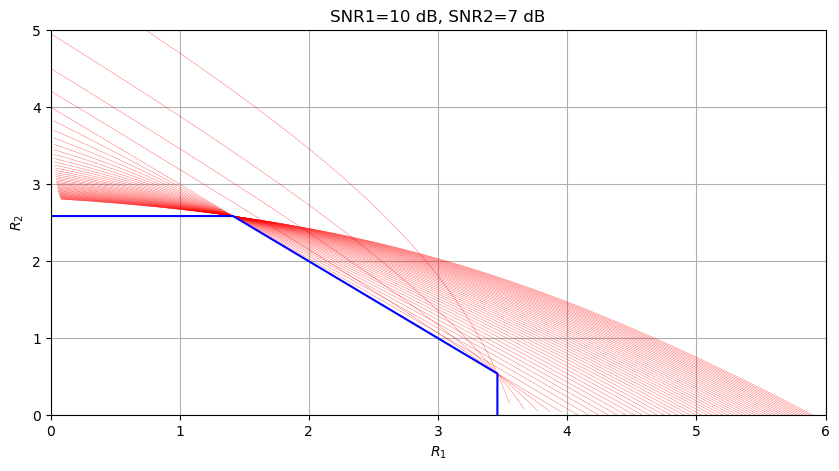

In [8]:
fig_1 = plt.figure(figsize=(10,5))
ax = fig_1.add_subplot(111)
for run in range(len(a)):
    ax.plot(C1_BC[run,:],C2_BC[run,:],'r-',linewidth=0.2)
x = [0., C1_2_MAC, C1, C1]
y = [C2, C2, C2_1_MAC, 0.]
ax.plot(x,y,'b-')
plt.grid(True)
plt.xlim(0, 6)
plt.ylim(0, 5)
plt.xlabel('$R_1$')
plt.ylabel('$R_2$')
plt.title('SNR1=%d dB, SNR2=%d dB' %(SNR1dB, SNR2dB))
plt.show()